In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataset/vendas_loja_seminovos.csv', sep=';')

In [3]:
df.head(3)

,ID,Nome Completo,Idade,CPF,Sexo,Estado Civil,E-mail,Telefone,Cidade,Estado,Marca,Modelo,Ano_fabricacao,Cor,Valor_venda,Data_venda,Forma_pagamento
0,1,Luigi Silva,53,910.623.485-24,Masculino,Viúvo,monteirovalentim@example.org,+55 21 0592 1284,Azevedo de da Rosa,SP,Toyota,Yaris,2021,Cinza,80028.52,2017-08-31,À vista
1,2,Ester da Rocha,63,235.408.196-06,Feminino,Solteiro,santoshenry@example.net,(084) 2407 2800,Costela,PR,Hyundai,HB20S,2016,Cinza,103668.13,2022-01-01,Consórcio
2,3,Maria Luiza Nogueira,25,174.950.328-04,Feminino,Solteiro,zgoncalves@example.net,+55 81 2567 8847,Sá Alegre,MG,Ford,Ecosport,2017,Preto,229867.69,2018-02-17,À vista


In [4]:
df['Idade'].sort_values(ascending=True).unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70])

In [5]:
regraDeSturges = lambda n : int(np.round(1 + 3.3322 * np.log10(n)))

In [6]:
amplitudeTotal = lambda coluna : coluna.max() - coluna.min()

In [7]:
amplitudeDeClasse = lambda amplitudetotal, qtdclasses : int(np.round(amplitudetotal / qtdclasses))

In [8]:
def gerarBinsLabels(lista, qtdClasse):
    amplitude_total = amplitudeTotal(lista)
    amplitude_classe = int(np.round(amplitude_total / qtdClasse))

    valor = lista.min()
    bins = [valor]
    labels = []

    for i in range(qtdClasse):
        inicio = valor
        valor += amplitude_classe
        bins.append(valor)
        labels.append(f'{inicio}-{valor}')

    return bins, labels

In [9]:
def dadosAgrupadosPorClasse(data, colunaNome):
    lista = data[colunaNome].copy().sort_values()
    regrasturges = regraDeSturges(lista.count())
    bins, labels = gerarBinsLabels(lista, regrasturges)
    data['Agrupado'] = pd.cut(data[colunaNome], bins= bins, labels= labels)
    return data

In [10]:
df2 = df[['Idade', 'Valor_venda']].copy()
agrupadoPorIdade = dadosAgrupadosPorClasse(df2, 'Idade')
agrupadoPorIdade

,Idade,Valor_venda,Agrupado
0,53,80028.52,50-54
1,63,103668.13,62-66
2,25,229867.69,22-26
3,19,105843.27,18-22
4,40,66929.84,38-42
...,...,...,...
10945,34,231302.02,30-34
10946,69,232535.91,66-70
10947,20,224157.58,18-22
10948,21,76003.85,18-22


In [11]:
df2 = agrupadoPorIdade.groupby('Agrupado', observed=False)['Valor_venda'].sum()
df2

Agrupado
18-22    1.223452e+08
22-26    1.080787e+08
26-30    1.199679e+08
30-34    1.144744e+08
34-38    1.138450e+08
38-42    1.111953e+08
42-46    1.203171e+08
46-50    1.094677e+08
50-54    1.173767e+08
54-58    1.184956e+08
58-62    1.130508e+08
62-66    1.149614e+08
66-70    1.296441e+08
70-74    0.000000e+00
Name: Valor_venda, dtype: float64

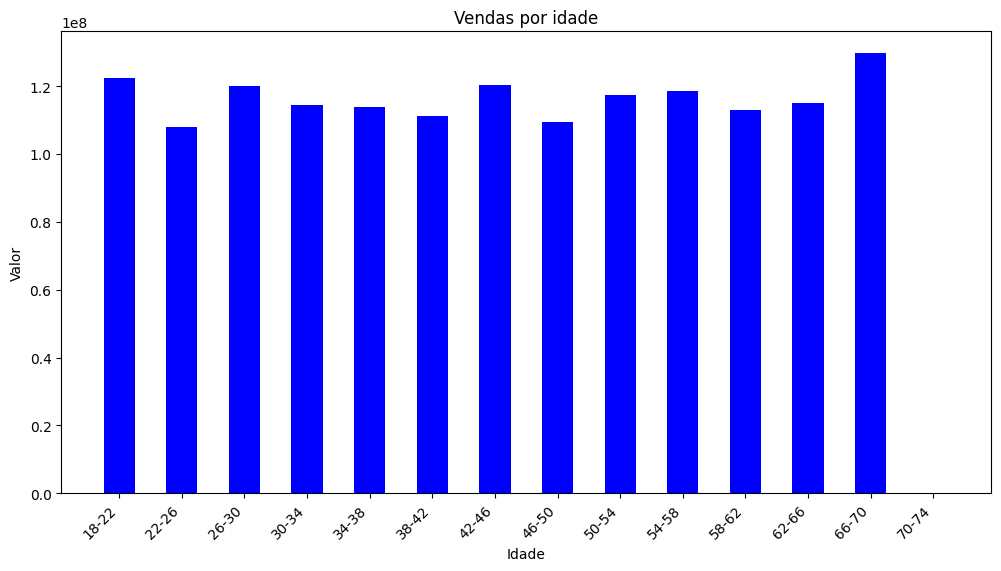

In [12]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=45, ha='right')
plt.bar(df2.index, df2.values, width=0.5, color='blue', align='center')
plt.ylabel('Valor')
plt.xlabel('Idade')
plt.title('Vendas por idade')
plt.show()